In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import normalize

In [2]:
od_demand = np.load('Data/od-demand-202010-150.npy')
od_stop = np.load('Data/od_stop-202010-150.npy', allow_pickle=True)
od_time = np.load('Data/od_time-202010-150.npy', allow_pickle=True)

In [3]:
print("od_demand shape: ", od_demand.shape)
print("od_time shape: ", od_time.shape)
print("od_stop: ", od_stop) # Abbreviations of the ten timing points of busline 150s

od_demand shape:  (5786, 10, 10)
od_time shape:  (5786,)
od_stop:  ['KDST' 'EGEV' 'HHLS' 'HHM' 'GLHO' 'NÆST' 'KLBV' 'RYST' 'HKP' 'NPST1']


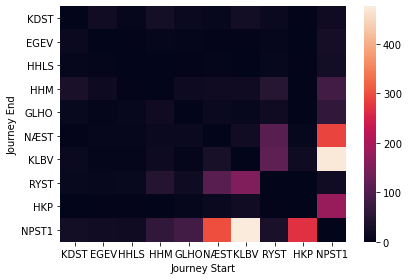

In [17]:
fig = sb.heatmap(np.sum(od_demand[2000:2048],0))
fig.set_xticklabels(od_stop)
fig.set_yticklabels(od_stop, rotation=0)
plt.xlabel('Journey Start')
plt.ylabel('Journey End')
plt.tight_layout()
plt.savefig('Plots/Heatmap.png', dpi=300)

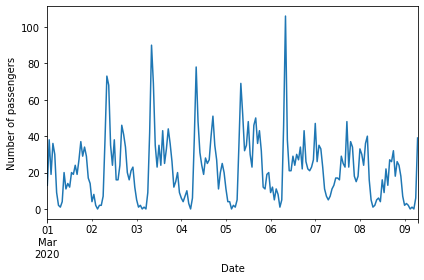

In [20]:
# Daily number of passengers from NPST1 to NAEST for the first 200 hours
passenger_df = pd.DataFrame(od_demand[:,9,5], index=od_time, columns=['PassengerNumber'])
passenger_df.index = pd.to_datetime(passenger_df.index, format='%Y-%m-%d %H:%M:%S')
passenger_df['PassengerNumber'].iloc[0:200].plot();
plt.xlabel("Date");
plt.ylabel("Number of passengers");
plt.tight_layout()
plt.savefig('Plots/Pattern.png', dpi=300)
# pattern visible (rush hours, night time)

In [11]:
"""Aggregate data to demand for the intervals between timing points"""

# Preallocate arrays for passenger numbers in both directions
demand_link_forth = np.zeros((len(od_demand[:]),len(od_demand[0,:])-1))
demand_link_back = np.zeros((len(od_demand[:]),len(od_demand[0,:])-1))

for i in range(len(od_demand[:])):
    for j in range(len(od_demand[0,:])-1):
        # demand in forward direction
        demand_link_forth[i,j] = np.sum(od_demand[i,0:j+1,j+1:])
        # demand in reverse direction
        demand_link_back[i,j] = np.sum(od_demand[i,j:,0:j])

# save to drive
np.save("Data/demand_link_back.npy", demand_link_back)
np.save("Data/demand_link_forth.npy", demand_link_forth)

In [12]:
print(demand_link_back.shape)
print(demand_link_forth.shape)

(5786, 9)
(5786, 9)


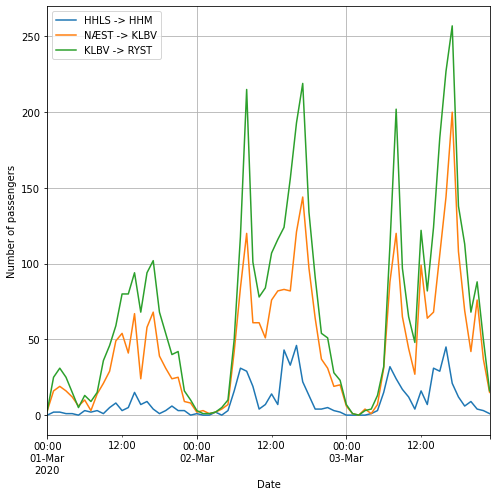

In [13]:
# Daily number of passengers that check out at specific timing point
plt.figure(figsize=(7,7))
index_list = [2, 5, 6]
for i in index_list:
  df_tmp = pd.DataFrame(demand_link_forth[:,i], index=od_time, columns=['PassengerNumber'])
  df_tmp.index = pd.to_datetime(df_tmp.index, format='%Y-%m-%d %H:%M:%S')
  df_tmp['PassengerNumber'].iloc[0:72].plot()
plt.legend([od_stop[i] + " -> " + od_stop[i+1] for i in index_list]);
plt.xlabel("Date");
plt.grid()
plt.ylabel("Number of passengers");
plt.tight_layout()
plt.savefig('Plots/data_prep.png', dpi=300)